In [21]:
# Importing Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Ignore all warnings
import warnings

warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv("Dataset.csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [24]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  9551
Number of columns are:  21


In [25]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


In [26]:
# Missing Values/Null Values Count
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

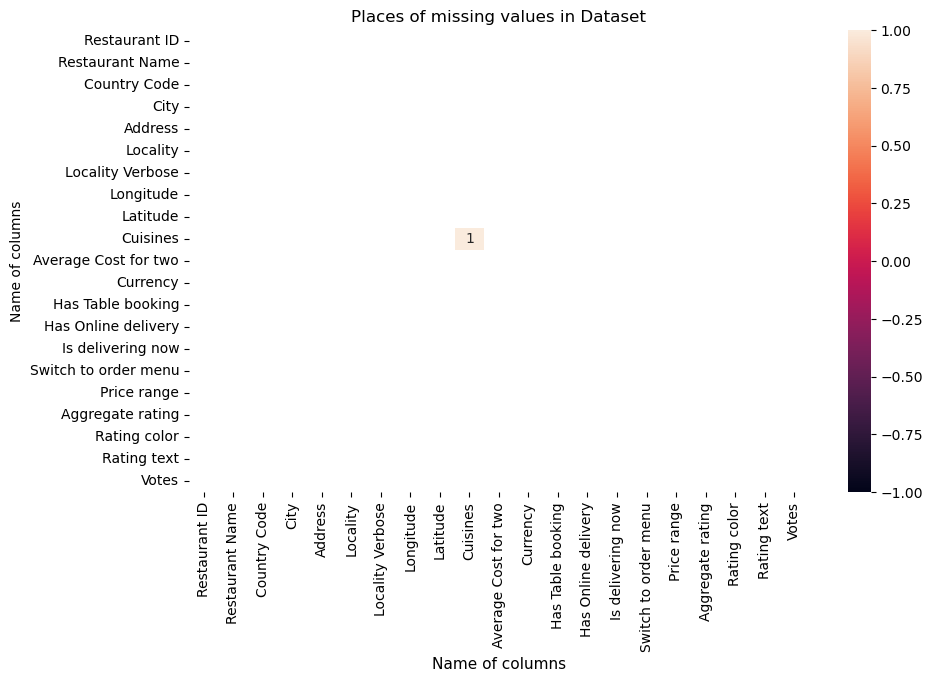

In [27]:
# Visualizing the missing values
# Checking Null Value by Plotting Heatmap

# Set the plot size
plt.figure(figsize = (10,6))

# Create the figure object
sns.heatmap(df.isnull().corr(), vmin=-1, annot= True)

# Set labels
plt.xlabel('Name of columns', fontsize=11)
plt.ylabel('Name of columns', fontsize=10)
plt.title('Places of missing values in Dataset', fontsize=12)

# To show
plt.show()

In [28]:
# If the null values number will high, then we can replace it with any placeholder value. In case if we drop them, we will loss a lot of data
# So, since Cuisines column have low number of missing values, that is only 9, i have dropping the same
df = df.dropna(subset=['Cuisines'])

In [29]:
# Checking missing values again for confirmation
print("Missing values/null values count after handling:")
df.isna().sum()

Missing values/null values count after handling:


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [30]:
# Dataset Information
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu 

In [31]:
# Distribution of the target variable ("Aggregate rating") and identify class imbalance
target_counts = df['Aggregate rating'].value_counts()
print("Distribution of target variable:")
print(target_counts)

Distribution of target variable:
0.0    2148
3.2     522
3.1     519
3.4     495
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     399
2.9     381
3.9     332
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     143
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      41
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64


In [32]:
# Basic statistical measures (mean, median, standard deviation, etc.) for numerical columns
# Select Numerical Columns
numeric_columns = df.select_dtypes(include=['int', 'float'])

# Calculate basic statistical measures using .describe()
summary_stats = numeric_columns.describe()
print(summary_stats)

       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.542000e+03   9542.000000  9542.000000  9542.000000   
mean    9.043301e+06     18.179208    64.274997    25.848532   
std     8.791967e+06     56.451600    41.197602    11.010094   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019312e+05      1.000000    77.081565    28.478658   
50%     6.002726e+06      1.000000    77.192031    28.570444   
75%     1.835260e+07      1.000000    77.282043    28.642711   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9542.000000  9542.000000       9542.000000   9542.000000  
mean            1200.326137     1.804968          2.665238    156.772060  
std            16128.743876     0.905563          1.516588    430.203324  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

In [33]:
# Individual statistics
# Calculate mean for numerical columns
mean = numeric_columns.mean()
print(f"Mean for numerical columns:\n{mean}")

Mean for numerical columns:
Restaurant ID           9.043301e+06
Country Code            1.817921e+01
Longitude               6.427500e+01
Latitude                2.584853e+01
Average Cost for two    1.200326e+03
Price range             1.804968e+00
Aggregate rating        2.665238e+00
Votes                   1.567721e+02
dtype: float64


In [34]:
# Calculate median for numerical columns
median = numeric_columns.median()
print(f"\nMedian for numerical columns:\n{median}")


Median for numerical columns:
Restaurant ID           6.002726e+06
Country Code            1.000000e+00
Longitude               7.719203e+01
Latitude                2.857044e+01
Average Cost for two    4.000000e+02
Price range             2.000000e+00
Aggregate rating        3.200000e+00
Votes                   3.100000e+01
dtype: float64


In [35]:
# Calculate standard deviation for numerical columns
std_dev = numeric_columns.std()
print(f"\nStandard deviation for numerical columns:\n{std_dev}")


Standard deviation for numerical columns:
Restaurant ID           8.791967e+06
Country Code            5.645160e+01
Longitude               4.119760e+01
Latitude                1.101009e+01
Average Cost for two    1.612874e+04
Price range             9.055631e-01
Aggregate rating        1.516588e+00
Votes                   4.302033e+02
dtype: float64


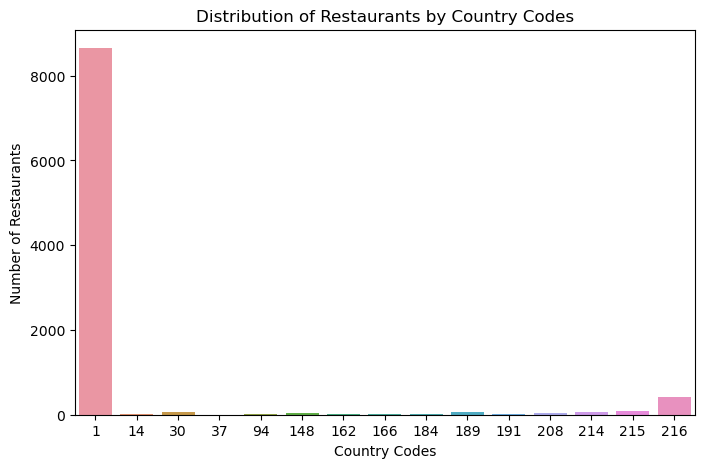

In [36]:
# Distribution of categorical variables like 'Country Code', 'City', and 'Cuisines'

# Count Plot Visualization Code for Country Codes
# Set plot size
plt.figure(figsize=(8, 5))

# Create the figure object
sns.countplot(x = df['Country Code'])

# Set Labels
plt.xlabel('Country Codes')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Restaurants by Country Codes')

# Display Chart
plt.show()

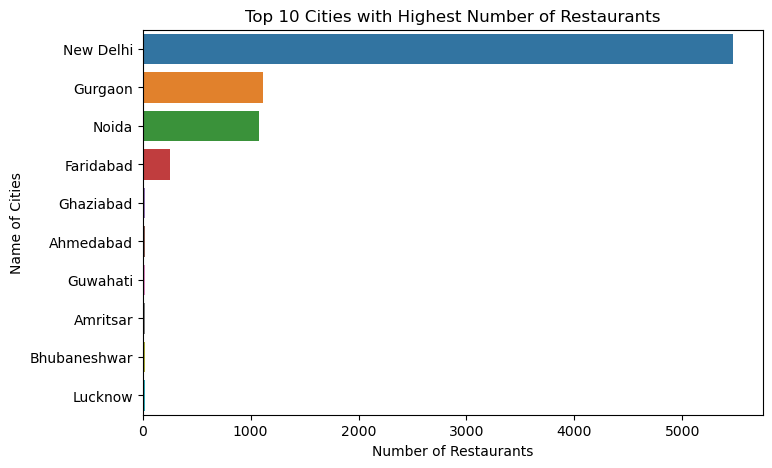

In [37]:
# Count Plot Visualization Code for Cities
# Set plot size
plt.figure(figsize=(8, 5))

# Create the figure object
# There are many cities names present in the data, so i select only the top 10 cities
sns.countplot(y = df['City'], order=df.City.value_counts().iloc[:10].index)

# Set Labels
plt.xlabel('Number of Restaurants')
plt.ylabel('Name of Cities')
plt.title('Top 10 Cities with Highest Number of Restaurants')

# Display Chart
plt.show()


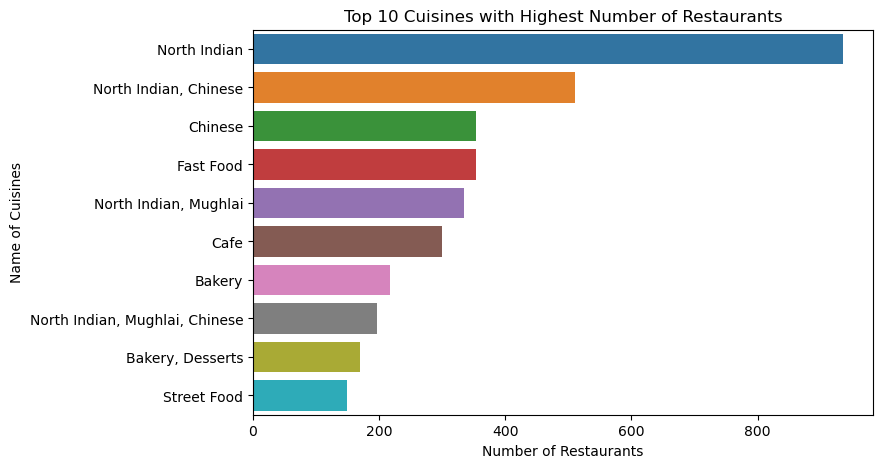

In [38]:
# Count Plot Visualization Code for Cuisines
# Set plot size
plt.figure(figsize=(8, 5))

# Create the figure object
# There are many cuisine names present in the data, so i select only the top 10 cuisines
sns.countplot(y = df['Cuisines'], order=df.Cuisines.value_counts().iloc[:10].index)

# Set Labels
plt.xlabel('Number of Restaurants')
plt.ylabel('Name of Cuisines')
plt.title('Top 10 Cuisines with Highest Number of Restaurants')

# Display Chart
plt.show()

In [39]:
# Top cuisines and cities with the highest number of restaurants

# Identify the top 10 cuisines
top_cuisines = df['Cuisines'].value_counts().head(10)

# Display the results
print("Top 10 Cuisines with Highest Number of Restaurants:")
print(top_cuisines)

Top 10 Cuisines with Highest Number of Restaurants:
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64


In [43]:
pip install geopandas

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/e3/23/00912e3236306ec52a06f95a08918cbb54f900419951726a20a8783a8507/geopandas-0.14.2-py3-none-any.whl.metadata
  Obtaining dependency information for fiona>=1.8.21 from https://files.pythonhosted.org/packages/7f/27/b24c1610c7ae5716709321f04d38d7b8b71ed531f80df4f697b9ad99cfc3/fiona-1.9.5-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/51.1 kB ? eta -:--:--
     ---------------------- --------------- 30.7/51.1 kB 435.7 kB/s eta 0:00:01
     ---------------------- --------------- 30.7/51.1 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 51.1/51.1 kB 327.0 kB/s eta 0:00:00
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/79/95/eb68113c5b5737c342bde1bab92705dabe69c16299c5a122616e50f1fbd6/pyproj-3.6.1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.1 MB ? et

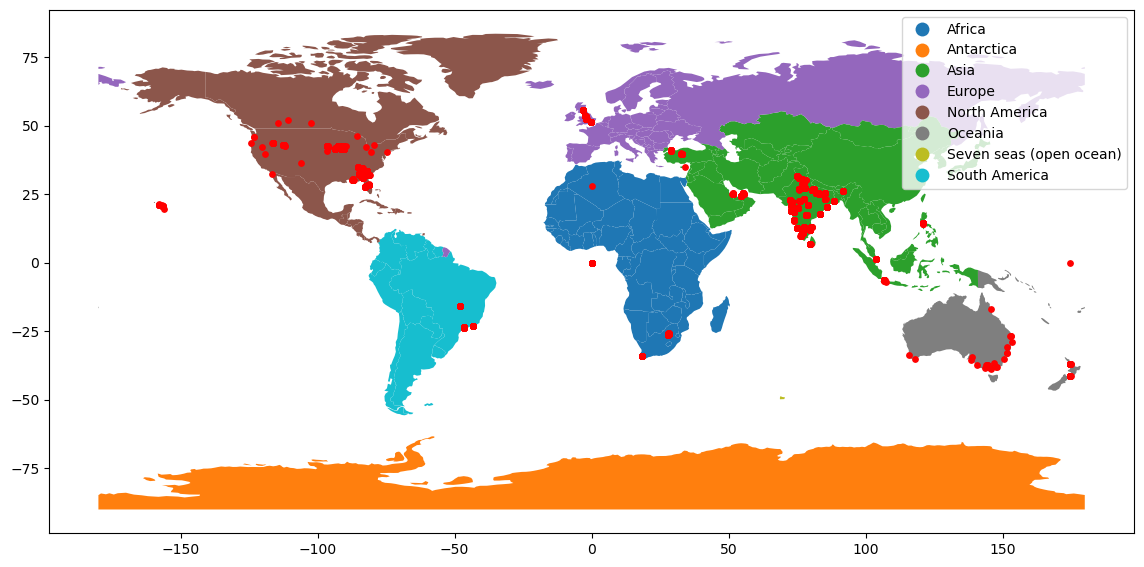

In [44]:
# Locations of restaurants on a map using latitude and longitude information
# Import the necessary libraries
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

# Create Point geometry from latitude and longitude using Shapely
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.Longitude, df.Latitude)
)

# Create a base map of the world using Geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a map that fits the screen and plots the restaurant locations
# The "continent" column is used for coloring and a legend is displayed
gdf.plot(ax=world.plot("continent", legend = True, figsize=(14, 12)), marker='o', color='red', markersize=15)

# Show the map
plt.show()

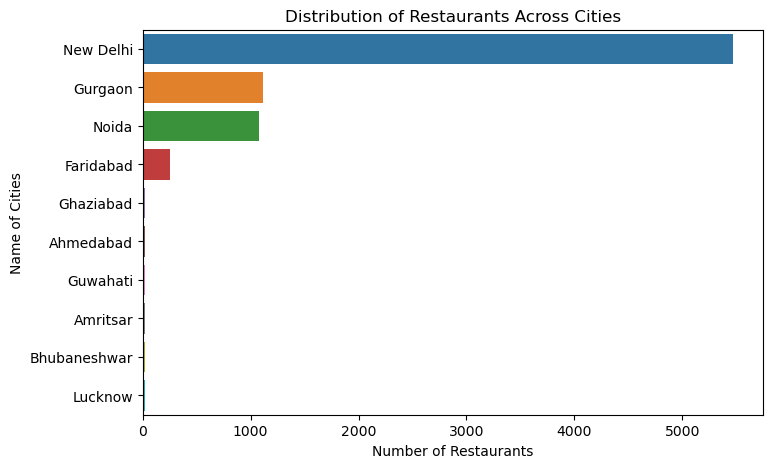

In [45]:
# Distribution of restaurants across different cities or countries
# Set plot size
plt.figure(figsize=(8, 5))

# Create the figure object
# There are many cities names present in the data, so i select only the top 10 cities
sns.countplot(y = df['City'], order=df.City.value_counts().iloc[:10].index)

# Set Labels
plt.xlabel('Number of Restaurants')
plt.ylabel('Name of Cities')
plt.title('Distribution of Restaurants Across Cities')

# Display Chart
plt.show()


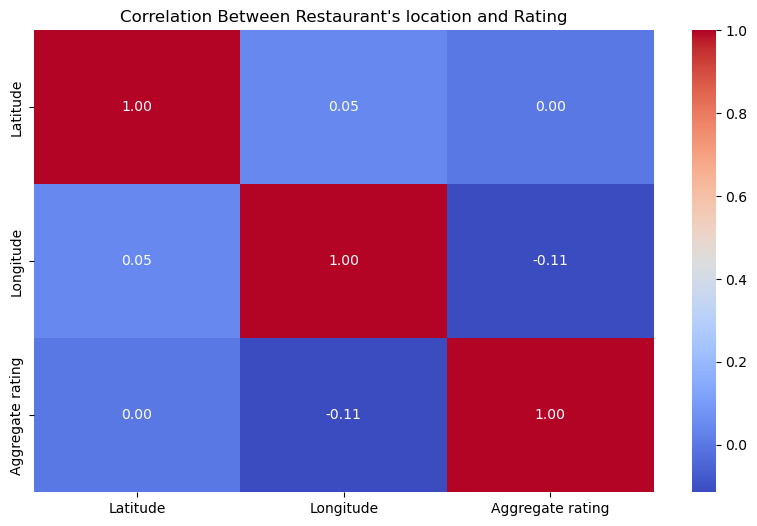

In [46]:
# Checking correlation between the restaurant's location and its rating
# Set plot size
plt.figure(figsize=(10, 6))

# Calculate the correlation between latitude, longitude, and ratings
correlation_matrix = df[['Latitude', 'Longitude', 'Aggregate rating']].corr()

# Create a heatmap to visualize the correlation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set Title
plt.title("Correlation Between Restaurant's location and Rating")

# Display Chart
plt.show()